In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib.pyplot as plt

In [62]:

from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().data
print(faces.shape) #400 images 64x64


(400, 4096)


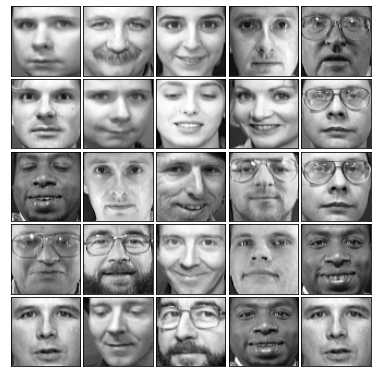

In [63]:
fig = plt.figure(figsize=(5,5)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 

j = 1
for i in np.random.choice(range(faces.shape[0]), 25): 
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(faces[i,:],(64,64)), cmap='gray', interpolation= 'antialiased') 
    j += 1
plt.show()

In [64]:
n_comp =96
pca_pipe = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=n_comp))])
faces_proj = pca_pipe.fit_transform(faces)
print(faces_proj.shape)



(400, 96)


Text(0.5, 1.0, 'Projection')

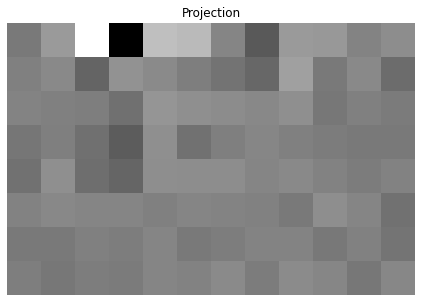

In [81]:
plt.figure(figsize=(10,5))
plt.imshow(np.reshape(faces_proj[255,:],(8,12)), cmap=plt.cm.gray)
plt.axis('off')
plt.title('Projection')

In [82]:
pca_pipe.named_steps['pca'].components_.shape #principal components in orginal space

(96, 4096)

In [72]:
mean = pca_pipe.named_steps['scaling'].mean_ #StandardScaler().fit(faces).mean_
mean.shape

(4096,)

In [67]:
variance = pca_pipe.named_steps['scaling'].var_

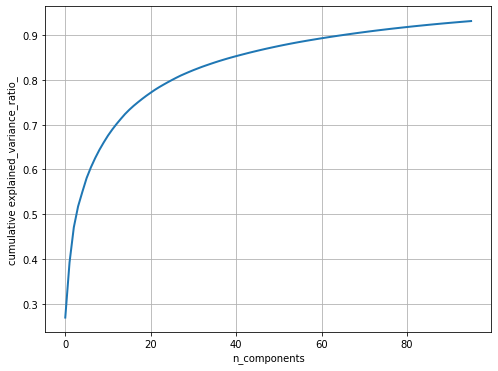

In [68]:
fig = plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_pipe.named_steps['pca'].explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('n_components'), plt.ylabel('cumulative explained_variance_ratio_')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(np.reshape(mean,(64,64)), cmap=plt.cm.gray)
plt.axis('off')
plt.title('Mean face')
plt.subplot(122)
plt.imshow(np.reshape(variance,(64,64)), cmap='gray')
plt.axis('off')
plt.title('SD face')
plt.show()

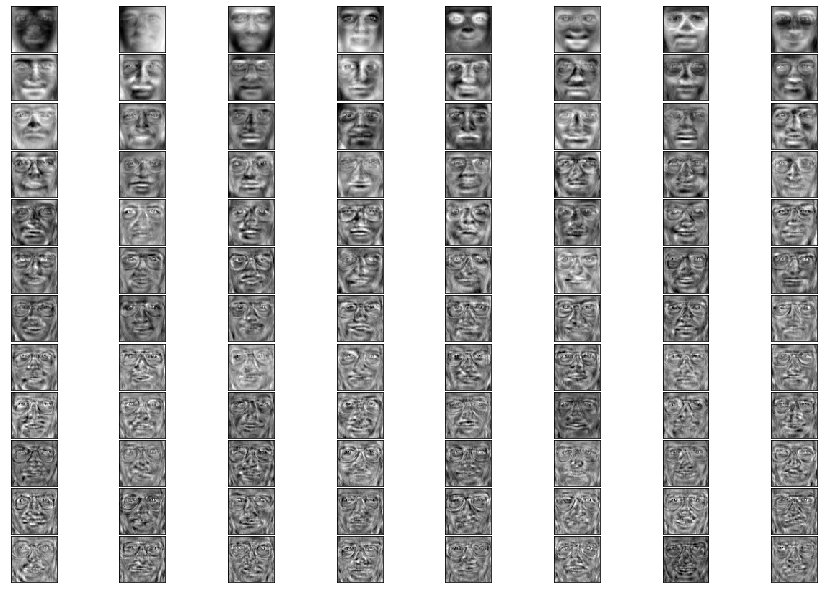

In [85]:

fig = plt.figure(figsize=(12,8)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot 10 eigenfaces defined by PC's
for i in range(96): 
    ax = fig.add_subplot(12, 8, i+1, xticks=[], yticks=[]) 
    ax.imshow(np.reshape(pca_pipe.named_steps['pca'].components_[i,:], (64,64)), cmap='gray', interpolation='nearest')


In [86]:
pca_pipe.named_steps['pca'].components_.shape

(96, 4096)

In [87]:
faces_inv_proj = pca_pipe.named_steps['pca'].inverse_transform(faces_proj) 

Text(0.5, 1.0, 'Reconstructed')

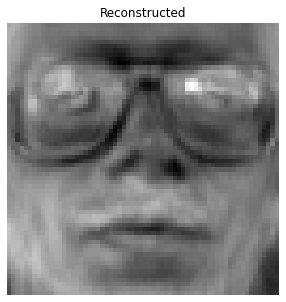

In [88]:
plt.figure(figsize=(10,5))
plt.imshow(np.reshape(faces_inv_proj[11,:],(64,64)), cmap=plt.cm.gray)
plt.axis('off')
plt.title('Reconstructed')

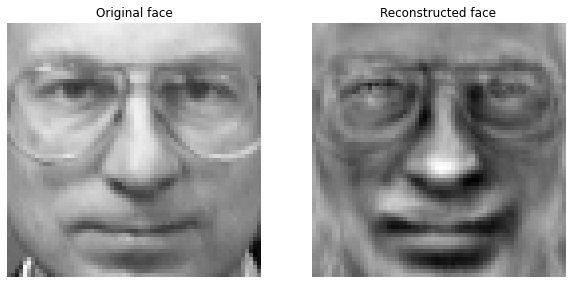

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(np.reshape(faces[121,:],(64,64)), cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original face')
plt.subplot(122)
plt.imshow(np.reshape(faces_inv_proj[121,:],(64,64)),cmap=plt.cm.gray)
plt.axis('off')
plt.title('Reconstructed face')
plt.show()